In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

### load dataset

In [188]:
zomato=pd.read_csv('zomato.csv')
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# DATA-PREPROCESSING

###  shape

In [189]:
zomato.shape

(51717, 17)

In [190]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [192]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### missing/null values

In [193]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### percentage of missing/null values

In [194]:
((zomato.isnull() | zomato.isna()).sum()*100 / zomato.index.size)

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [195]:
zomato['dish_liked'].describe()

count       23639
unique       5271
top       Biryani
freq          182
Name: dish_liked, dtype: object

### droped dish_liked column because it was having mising value more than 50%

In [196]:
#zomato.dropna(['dish_liked'],axis=1)

zomato.drop(['dish_liked'], axis = 1,inplace=True) 

In [197]:
zomato = zomato.rename(columns = {"approx_cost(for two people)":"approx_cost(for_two_people)"})
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for_two_people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [198]:
zomato.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for_two_people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [199]:
# Removed special character from the column to convert it into float/int

zomato['approx_cost(for_two_people)']=zomato['approx_cost(for_two_people)'].str.replace(',','')
zomato.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for_two_people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,Finger Food,2000,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental",1500,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


### converted string column to float by using pandas.to_numeric() function

In [200]:
# zomato['approx_cost(for_two_people)']=zomato['approx_cost(for_two_people)'].astype(int).dtypes

zomato['approx_cost(for_two_people)'] = pd.to_numeric(zomato['approx_cost(for_two_people)'], downcast="float")

In [201]:
zomato.iloc[[890,900]]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for_two_people),reviews_list,menu_item,listed_in(type),listed_in(city)
890,https://www.zomato.com/bangalore/cafe-arabica-...,"4, 1st Cross, Christ School Road, Bhavani Layo...",Cafe Arabica,No,No,3.8/5,69,080 64442444\r\n+91 8050042444,Bannerghatta Road,"Cafe, Bakery","Cafe, Bakery",700.0,"[('Rated 3.0', 'RATED\n Went to have dessert....",[],Cafes,Bannerghatta Road
900,https://www.zomato.com/bangalore/healthy-smoot...,"1239, 4th Cross 4th Main, Kodichicnahalli, Ban...",Healthy Smoothie,No,No,NaN,0,+91 8050257921,Bannerghatta Road,Delivery,"American, Bakery, Beverages, Cafe, Healthy Foo...",300.0,[],[],Cafes,Bannerghatta Road


In [202]:
zomato.corr()

,votes,approx_cost(for_two_people)
votes,1.000000,0.381804
approx_cost(for_two_people),0.381804,1.000000


### renaming column name from "rate" to "rating_by_5"

In [203]:
zomato = zomato.rename(columns = {"rate":"rating_by_5"})
zomato.head()

,url,address,name,online_order,book_table,rating_by_5,votes,phone,location,rest_type,cuisines,approx_cost(for_two_people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [204]:
zomato['rating_by_5'].count()

43942

In [205]:
# Removed special character from the column to convert it into float/int

zomato['rating_by_5']=zomato['rating_by_5'].str.replace('/5','')

In [206]:
zomato['rating_by_5']=zomato['rating_by_5'].str.replace(' ','')

In [207]:
#zomato['rating_by_5'] = pd.to_numeric(zomato['rating_by_5'], downcast="float")

ValueError: Unable to parse string "NEW" at position 72

In [186]:
### ValueError: Unable to parse string "NEW"

In [208]:
zomato[zomato['rating_by_5']=='NEW']

,url,address,name,online_order,book_table,rating_by_5,votes,phone,location,rest_type,cuisines,approx_cost(for_two_people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,+91 8050884222,Banashankari,Quick Bites,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,+91 8553206035,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
110,https://www.zomato.com/bangalore/hari-super-sa...,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,NEW,0,+91 9886722163,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200.0,"[('Rated 1.0', 'RATED\n I have been here many...",[],Delivery,Banashankari
130,https://www.zomato.com/bangalore/roll-magic-fa...,"28, 4th Cross Road, Dwaraka Nagar, Banashankar...",Roll Magic Fast Food,No,No,NEW,0,+91 9731409204,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200.0,[],[],Delivery,Banashankari
131,https://www.zomato.com/bangalore/foodlieious-m...,"3/16, 22 Main Road, Magenta Block, PES College...",Foodlieious Multi Cuisine,No,No,NEW,0,+91 9168753522\r\n+91 8217877100,Banashankari,Quick Bites,North Indian,100.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51585,https://www.zomato.com/bangalore/wow-tiffin-fo...,"Near Rama Temple, Immadihalli Road, Whitefield...",Wow Tiffin Food,No,No,NEW,0,+91 9535041209,Whitefield,Quick Bites,North Indian,200.0,[],[],Dine-out,Whitefield
51586,https://www.zomato.com/bangalore/quick-bites-w...,"119/5, Pattandur Agrahara, Near Brigade Tech p...",Quick Bites,Yes,No,NEW,0,+91 9742377087\n+91 7899303299,Whitefield,Quick Bites,Chinese,200.0,"[('Rated 5.0', 'RATED\n This is an awesome pl...","['Veg Chowmein + Manchurian', 'Paratha + Chick...",Dine-out,Whitefield
51603,https://www.zomato.com/bangalore/shiv-sagar-1-...,"Shop No 10, Food Court, 2nd Floor, Phoenix Mar...",Shiv sagar,Yes,No,NEW,0,+91 9513300048\n+91 8067266097,Whitefield,"Quick Bites, Food Court","South Indian, Chinese, North Indian",250.0,"[('Rated 3.0', 'RATED\n A highly expensive pl...","['Malai Paneer Tikka', 'Paneer Kofta', 'Mushro...",Dine-out,Whitefield
51604,https://www.zomato.com/bangalore/nawab-di-biry...,"17, Thubarahalli Village, Hobli, Varthur Main ...",Nawab Di Biryani,No,No,NEW,0,+91 7899298400\n+91 9818654628,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400.0,"[('Rated 3.0', 'RATED\n Biriyani had ordered ...",[],Dine-out,Whitefield


In [268]:
zomato['rating_by_5']=zomato['rating_by_5'].replace('NEW',np.nan)

In [270]:
zomato['rating_by_5']=zomato['rating_by_5'].replace('-',np.nan)

In [271]:
zomato['rating_by_5'] = pd.to_numeric(zomato['rating_by_5'], downcast="float")

In [276]:
# dropping all null values

zomato['rating_by_5'].dropna(axis=0,how='any',inplace=True)

### Replace all 'New' and ' - ' values with np.nan values from column 'rating_by_5',
### so that we can convert the column from string to float

In [272]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rating_by_5                  41665 non-null  float32
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  cuisines                     51672 non-null  object 
 11  approx_cost(for_two_people)  51371 non-null  float32
 12  reviews_list                 51717 non-null  object 
 13  menu_item       

In [273]:
zomato.describe()

,rating_by_5,votes,approx_cost(for_two_people)
count,41665.000000,51717.000000,51371.000000
mean,3.700456,283.697527,555.431519
std,0.440519,803.838853,438.835358
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [277]:
zomato.shape

(51717, 16)

In [214]:
zomato['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [216]:
zomato['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [231]:
zomato['rest_type'].nunique()

93

In [278]:
print(zomato['rating_by_5'].nunique())
zomato['rating_by_5'].unique()

31


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8], dtype=float32)

In [279]:
zomato['rating_by_5'].value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rating_by_5, dtype: int64

In [222]:
zomato['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [233]:
zomato['listed_in(city)'].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Whitefield               1620
Residency Road           1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_in(city), dtype: int64

In [ ]:
zomato['listed_in(type)'].value_counts()

# TIME TO DO SOME "EDA"

In [287]:
zomato.skew()

rating_by_5                   -0.328601
votes                          7.547819
approx_cost(for_two_people)    2.601984
dtype: float64

In [288]:
zomato.kurtosis()

rating_by_5                    -0.007483
votes                          88.866738
approx_cost(for_two_people)    10.449886
dtype: float64

In [289]:
zomato.corr()

,rating_by_5,votes,approx_cost(for_two_people)
rating_by_5,1.000000,0.434040,0.385183
votes,0.434040,1.000000,0.381804
approx_cost(for_two_people),0.385183,0.381804,1.000000


(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

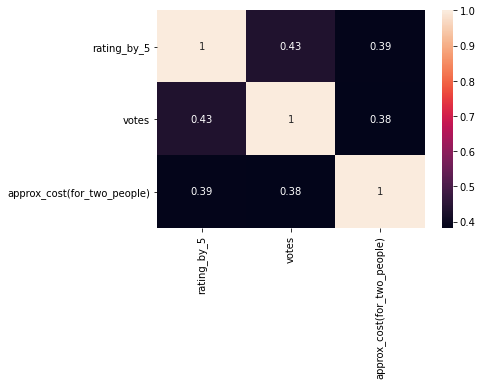

In [300]:
sns.heatmap(zomato.corr(),annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)

In [234]:
zomato['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

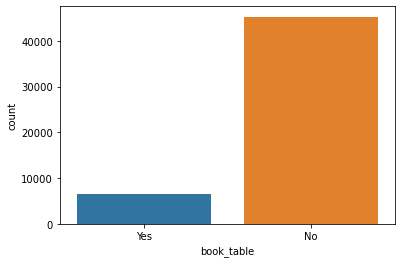

In [248]:
sns.countplot(zomato['book_table'])
plt.show()

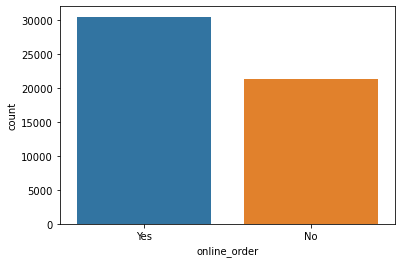

In [246]:
sns.countplot(zomato['online_order'])
plt.show()

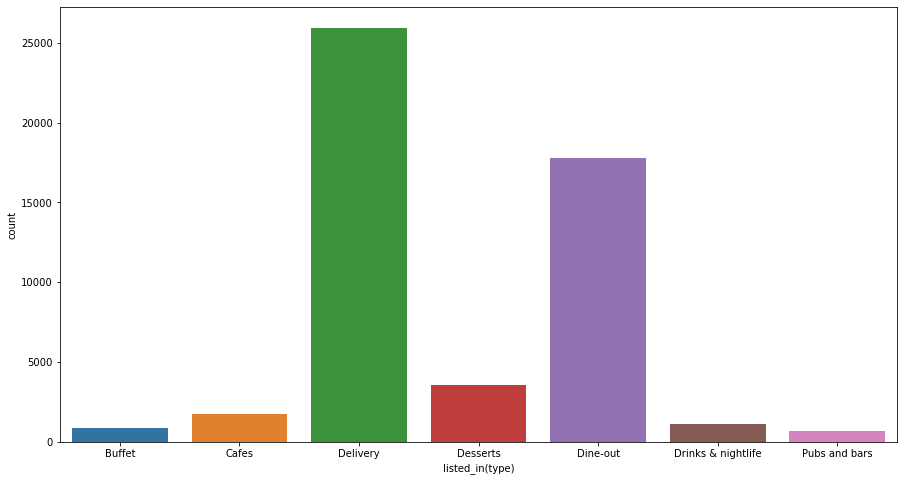

In [256]:
plt.figure(figsize=(15,8))
sns.countplot(zomato['listed_in(type)'])
plt.show()

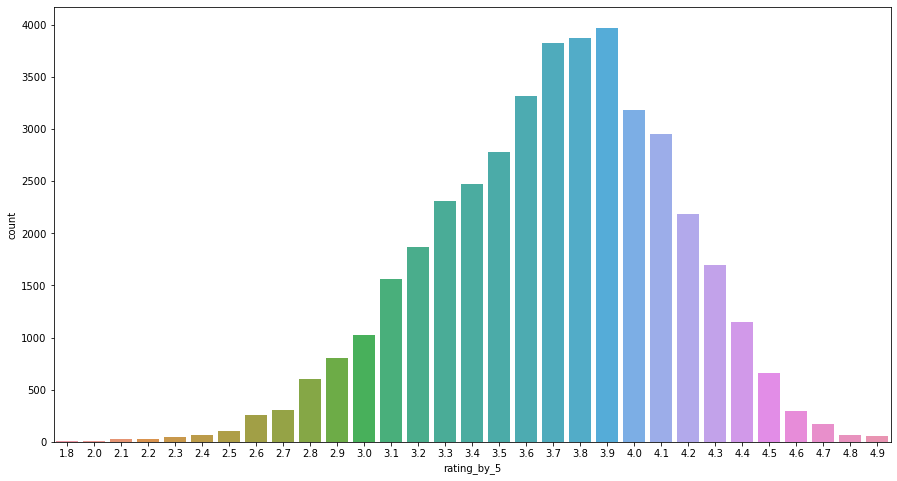

In [280]:
plt.figure(figsize=(15,8))
sns.countplot(zomato['rating_by_5'])
plt.show()

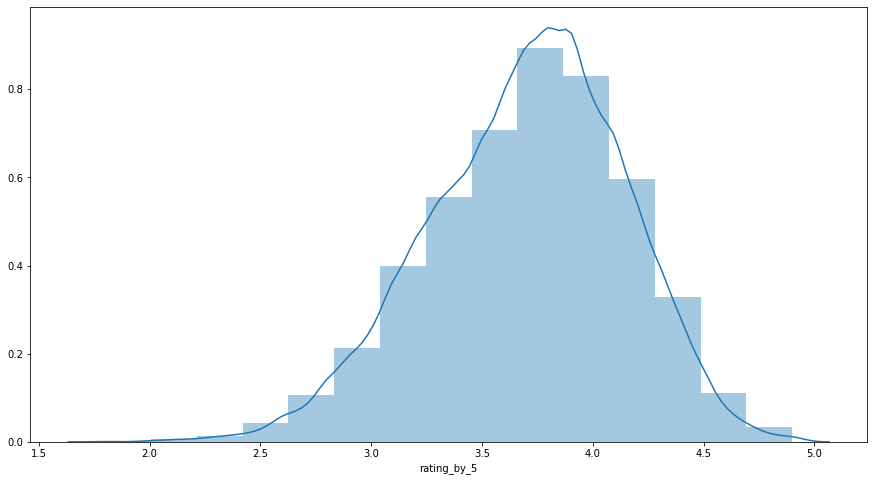

In [286]:
plt.figure(figsize=(15,8))
sns.distplot(zomato['rating_by_5'],bins=15)
plt.show()

In [301]:
zomato['rating_by_5'].value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rating_by_5, dtype: int64

In [308]:
zomato['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [316]:
zomato[zomato['cuisines']=='North Indian'].count()

url                            2913
address                        2913
name                           2913
online_order                   2913
book_table                     2913
rating_by_5                    2158
votes                          2913
phone                          2791
location                       2913
rest_type                      2899
cuisines                       2913
approx_cost(for_two_people)    2872
reviews_list                   2913
menu_item                      2913
listed_in(type)                2913
listed_in(city)                2913
dtype: int64